In [11]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
np.random.seed(1)

# a sample dataset from the original and also calculating mean, maximum values of glucose from the sample data
df= data.sample(n = 25)
mean_df = df['Glucose'].mean()
print("From the sample dataset,the mean value of glucose is :",mean_df)
highest_df = df['Glucose'].max()
print("From the sample dataset,the heighest value of glucose is :",highest_df)

From the sample dataset,the mean value of glucose is : 118.32
From the sample dataset,the heighest value of glucose is : 180


In [13]:
#calculate mean and maximum values of glucose feature from the entire dataset
total_mean = data['Glucose'].mean()
print("In entire the dataset,the mean value for glucose values is :",total_mean)
highest = data['Glucose'].max()
print("In entire the dataset,the maximum value for glucose values is :", highest)

In entire the dataset,the mean value for glucose values is : 120.89453125
In entire the dataset,the maximum value for glucose values is : 199


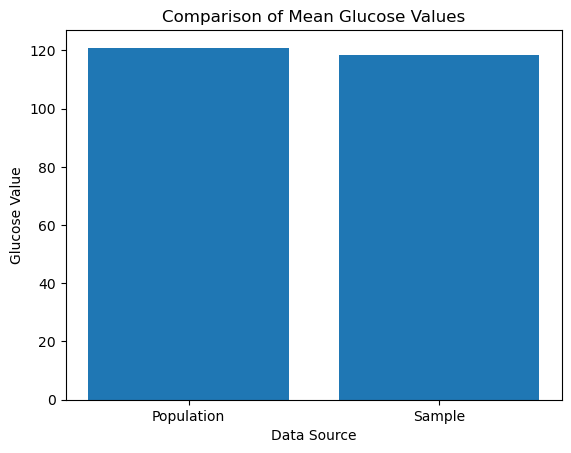

In [14]:
# plot a bar graph for mean glucose values for sample and entire Population 
mean_data = [total_mean, mean_df]
mean_labels = ['Population', 'Sample']
plt.bar(mean_labels, mean_data)
plt.title('Comparison of Mean Glucose Values')
plt.xlabel('Data Source')
plt.ylabel('Glucose Value')
plt.show()

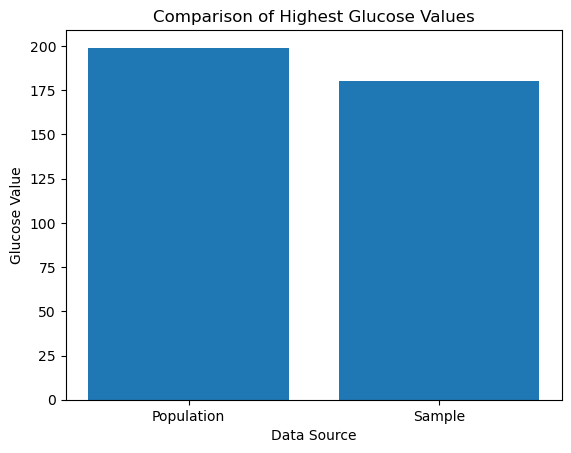

In [15]:
# plot a bar graph for max glucose values for sample and population
max_data = [highest, highest_df]
max_labels = ['Population', 'Sample']
plt.bar(max_labels, max_data)
plt.title('Comparison of Highest Glucose Values')
plt.xlabel('Data Source')
plt.ylabel('Glucose Value')
plt.show()

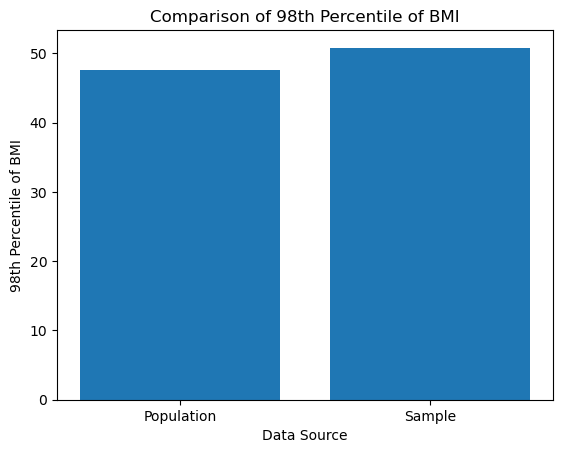

In [16]:
# calculating the bmi values 
sample_bmi_98th_percentile = np.percentile(df['BMI'], 98)
population_bmi_98th_percentile = np.percentile(data['BMI'], 98)

# creating a dataframe to keep the values together.
percentile_data = [population_bmi_98th_percentile, sample_bmi_98th_percentile]
percentile_labels = ['Population', 'Sample']

# plotting a bar chart to compare the results
plt.bar(percentile_labels, percentile_data)
plt.title('Comparison of 98th Percentile of BMI')
plt.xlabel('Data Source')
plt.ylabel('98th Percentile of BMI')
plt.show()

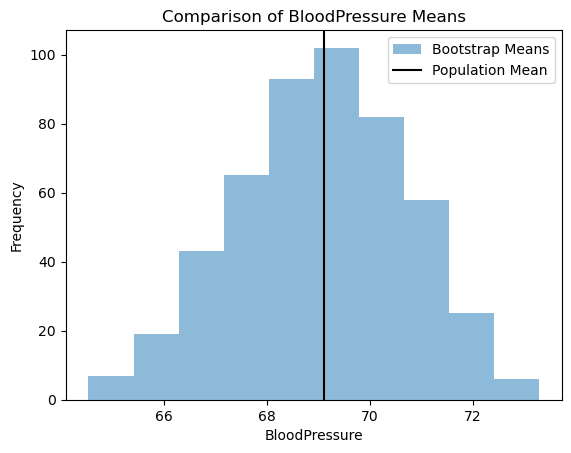

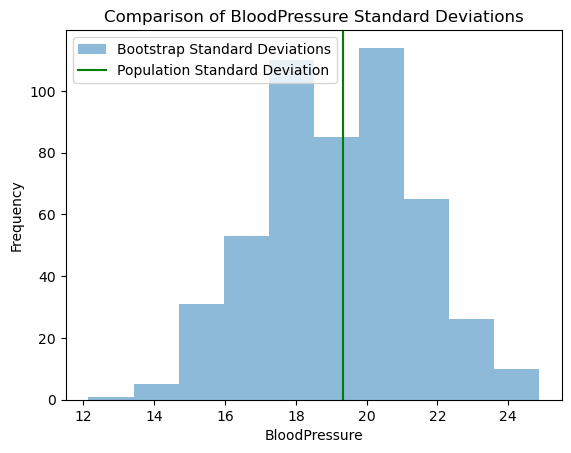

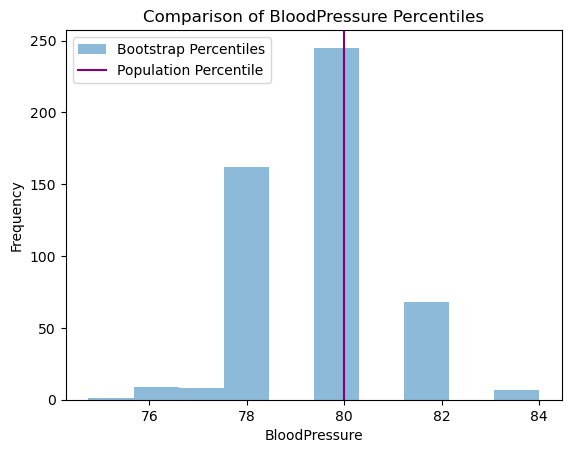

In [17]:
# Creating a function to generate a bootstrap sample of 150 observations
def bootstrap_sample():
    return np.random.choice(data['BloodPressure'], size=150, replace=True)

# Generating 500 bootstrap samples of 150 observations each from the population
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
for i in range(500):
    sample = bootstrap_sample()
    bootstrap_means.append(np.mean(sample))
    bootstrap_stds.append(np.std(sample))
    bootstrap_percentiles.append(np.percentile(sample, 75))

# Find the mean, standard deviation, and percentile for BloodPressure from the population
population_mean = np.mean(data['BloodPressure'])
population_std = np.std(data['BloodPressure'])
population_percentile = np.percentile(data['BloodPressure'], 75)

# Create a histogram to compare the mean of the bootstrap samples with the population mean
plt.hist(bootstrap_means, alpha=0.5, label='Bootstrap Means')
plt.axvline(population_mean, color='black', label='Population Mean')
plt.title('Comparison of BloodPressure Means')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a histogram to compare the standard deviation of the bootstrap samples with the population standard deviation
plt.hist(bootstrap_stds, alpha=0.5, label='Bootstrap Standard Deviations')
plt.axvline(population_std, color='green', label='Population Standard Deviation')
plt.title('Comparison of BloodPressure Standard Deviations')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a histogram to compare the percentile of the bootstrap samples with the population percentile
plt.hist(bootstrap_percentiles, alpha=0.5, label='Bootstrap Percentiles')
plt.axvline(population_percentile, color='purple', label='Population Percentile')
plt.title('Comparison of BloodPressure Percentiles')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()